# EC1B1 Group project


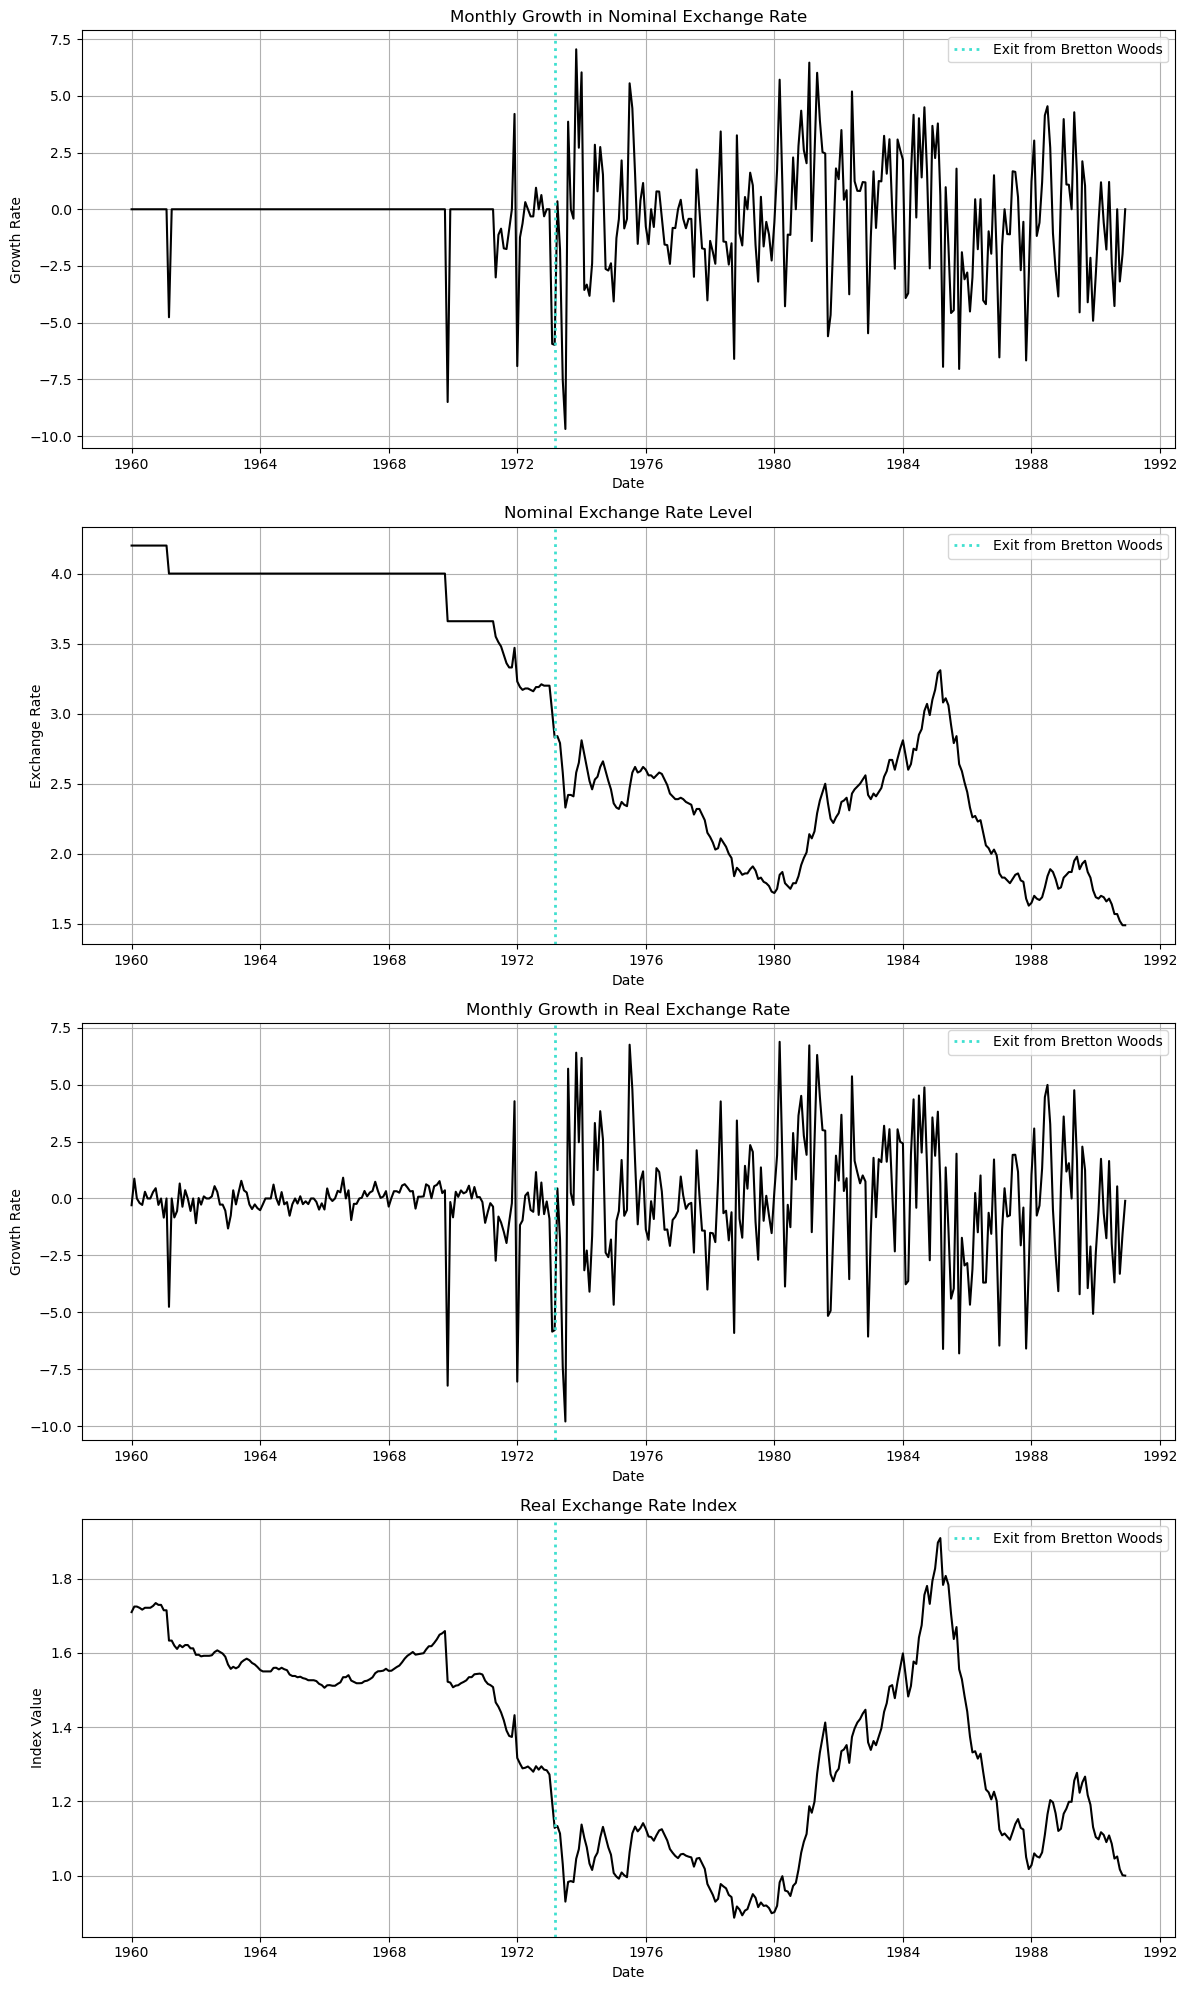

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("combined_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define time range: January 1960 to December 1990
start_date = "1960-01-01"
end_date = "1990-12-31"
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Define Germany Data 
germany = df['Country'].unique()[0] 
df_country = df[df['Country'] == germany].sort_values('Date')

# Set date Germany left the Bretton Woods system 
bretton_woods_exit = pd.to_datetime("1973-03-01")  

# Create figure and axes
fig, axes = plt.subplots(4, 1, figsize=(12, 20))

# Line style for plots
line_style = '-'

# Bright contrasting color to clearly show Bretton Woods exit
bretton_line_color = 'turquoise'

# Monthly growth in the nominal exchange rate
axes[0].plot(df_country['Date'], df_country['Exchange Rate Growth'], linestyle=line_style, color='black')
axes[0].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[0].set_title("Monthly Growth in Nominal Exchange Rate")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Growth Rate")
axes[0].legend()
axes[0].grid()

# Level of the nominal exchange rate
axes[1].plot(df_country['Date'], df_country['Exchange Rate'], linestyle=line_style, color='black')
axes[1].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[1].set_title("Nominal Exchange Rate Level")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Exchange Rate")
axes[1].legend()
axes[1].grid()

# Monthly growth in the real exchange rate
axes[2].plot(df_country['Date'], df_country['Real Exchange Rate Growth'], linestyle=line_style, color='black')
axes[2].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[2].set_title("Monthly Growth in Real Exchange Rate")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Growth Rate")
axes[2].legend()
axes[2].grid()

# Real exchange rate index
axes[3].plot(df_country['Date'], df_country['Real Exchange Rate Index'], linestyle=line_style, color='black')
axes[3].axvline(bretton_woods_exit, color=bretton_line_color, linestyle='dotted', linewidth=2, label="Exit from Bretton Woods")
axes[3].set_title("Real Exchange Rate Index")
axes[3].set_xlabel("Date")
axes[3].set_ylabel("Index Value")
axes[3].legend()
axes[3].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# • Was the US dollar over or undervalued in the Bretton Woods system? Refer to data or figures in
# your answer.

# Under the Bretton-Woods system, the US dollar was overvalued. In the data and figures above, this is shown by: 
# The near permanent decline in Nominal Exchange Rate, with the price of one USD in deutschmarks post-Bretton Woods staying consistently lower than the Pegs under Bretton Woods (4.2/4/3.66) – the new nominal exchange rate only peaked at around 3.3, showing the pegs were grossly overvaluing the USD in deutschmark terms. 
# The Real Exchange Rate Index between German and US being >1.4 Pre-Nixon Shock to much closer to the range of 1 post-Bretton Woods until ~1980 also supports this, with the 40% higher than index real exchange rate showing that the USD was overvalued compared to the index 
# Monthly growth in both of these also shows large downward spikes and then a return to consistent volatility levels, showing that steady-state exchange rate level lay much lower than the one under Bretton-Woods

# • Using your above figures, explain one reason for the US’s departure from the Bretton Woods system.

# As stated previously, the huge overvaluation of the Pegs (4.2/4/3.66) compared to post-BW exchange rate (3.3), as well as the much higher than-index real-exchange rate (>40% higher pre-Nixon Shock) meant that the price of USD in Deutschmarks was unjustifiably high. 
# This led to an undesirable and unsustainable balance of payments deficit, as Germans were dissuaded from buying US exports due to how expensive they were in deutschmarks, and Americans were much more likely to buy imports rather than US domestic goods due to the relative cheapness in dollar terms. This balance of payments deficit was a contributing factor to exiting Bretton-Woods, as a floating rate would result in a re-rating of the exchange rate more in line with the true, lower value of the dollar in deutschmark terms. 



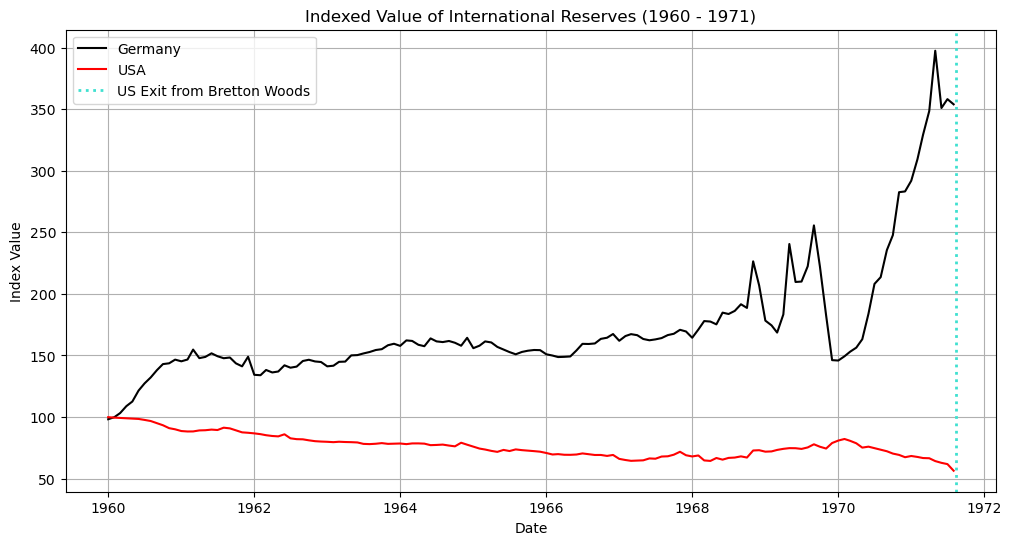

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset 
df = pd.read_csv("combined_data.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define time range: January 1960 until the US exit from Bretton Woods
start_date = "1960-01-01"
us_exit_bretton_woods = pd.to_datetime("1971-08-15")  # Adjust as needed

# Filter reserves data within the time range
df_reserves_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= us_exit_bretton_woods)]

# Get Germany Data
germany = df['Country'].unique()[0]  # Adjust if needed

# Extract reserves data for Germany and US
df_country_reserves = df_reserves_filtered[df_reserves_filtered['Country'] == germany][['Date', 'Reserves Index']]
df_us_reserves = df_reserves_filtered[df_reserves_filtered['Country'] == 'USA'][['Date', 'Reserves Index']]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot reserves for Germany
plt.plot(df_country_reserves['Date'], df_country_reserves['Reserves Index'], linestyle='-', color='black', label=germany)

# Plot reserves for US
plt.plot(df_us_reserves['Date'], df_us_reserves['Reserves Index'], linestyle='-', color='red', label='USA')

# Mark US exit from Bretton Woods
plt.axvline(us_exit_bretton_woods, color='turquoise', linestyle='dotted', linewidth=2, label="US Exit from Bretton Woods")

# Labels and title
plt.title("Indexed Value of International Reserves (1960 - 1971)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid()

# Show plot
plt.show()


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("combined_data.csv")

# Convert Date officially to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define Bretton Woods periods
before_bretton_woods_end = "1971-06-30"
after_bretton_woods_start = "1973-03-01"

# Separate data for Germany and USA
df_germany = df[df['Country'] == 'Germany']
df_us = df[df['Country'] == 'USA']

# Compute Inflation Difference by merging Germany and US data on Date (reconciling stacked table)
df_merged = pd.merge(df_germany[['Date', 'Monthly Inflation Rate']],
                      df_us[['Date', 'Monthly Inflation Rate']],
                      on='Date', suffixes=('_Germany', '_US'))
df_merged['Inflation Difference'] = df_merged['Monthly Inflation Rate_Germany'] - df_merged['Monthly Inflation Rate_US']

# Merge inflation difference back to Germany dataset
df_germany = df_germany.merge(df_merged[['Date', 'Inflation Difference']], on='Date', how='left')

# Filter data before and after Bretton Woods
df_before = df_germany[df_germany['Date'] <= before_bretton_woods_end]
df_after = df_germany[df_germany['Date'] >= after_bretton_woods_start]

# Variables to calculate standard deviation for
variables = [
    "Exchange Rate Growth",  # Monthly growth of nominal exchange rate
    "Real Exchange Rate Growth",  # Monthly growth of real exchange rate
    "Monthly Inflation Rate",  # Inflation rate in Germany
    "Inflation Difference",  # Difference between Germany's inflation and US inflation
    "Growth in Industrial Production"  # 12-monthly industrial production growth
]

# Doublecheck no issue with variables in dataset
variables = [var for var in variables if var in df_germany.columns]

# Compute standard deviations
std_before = df_before[variables].std()
std_after = df_after[variables].std()

# Compute ratio of standard deviations (before & after)
std_ratio = std_before / std_after

# Create results table
std_dev_table = pd.DataFrame({
    "Standard Deviation Before Bretton Woods": std_before,
    "Standard Deviation After Bretton Woods": std_after,
    "Ratio (Before / After)": std_ratio
})

# Save standard deviation table to CSV + Display
std_dev_table.to_csv("5.2.3_std_dev_table.csv", index=True)
print(std_dev_table)

# Get values from std_dev_table
labels = std_dev_table.index.tolist()
std_before_values = std_dev_table["Standard Deviation Before Bretton Woods"].values
std_after_values = std_dev_table["Standard Deviation After Bretton Woods"].values

# Set up the plot
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar([i - width/2 for i in x], std_before_values, width, label='Before Bretton Woods', color='red')
ax.bar([i + width/2 for i in x], std_after_values, width, label='After Bretton Woods', color='green')

# Labels and formatting
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of German Economic Indicators\nBefore and After Bretton Woods')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# Why might it be a good idea to exclude data from 07/1971 - 02/1973 for the above calculations?

# Though the Nixon Shock was around 07/1991, until March of 1973, the official move of Germany to floating rates wasn’t finalised, with multiple failed attempts from both US/Europe to renew the Bretton Woods system. As this period represents a sort of transitory or extraneous period, without precise delineation of falling either pre or post-Bretton Woods, the data points within this time range should thus be excluded for the sake of clarity when calculating standard deviations. 






KeyboardInterrupt: 

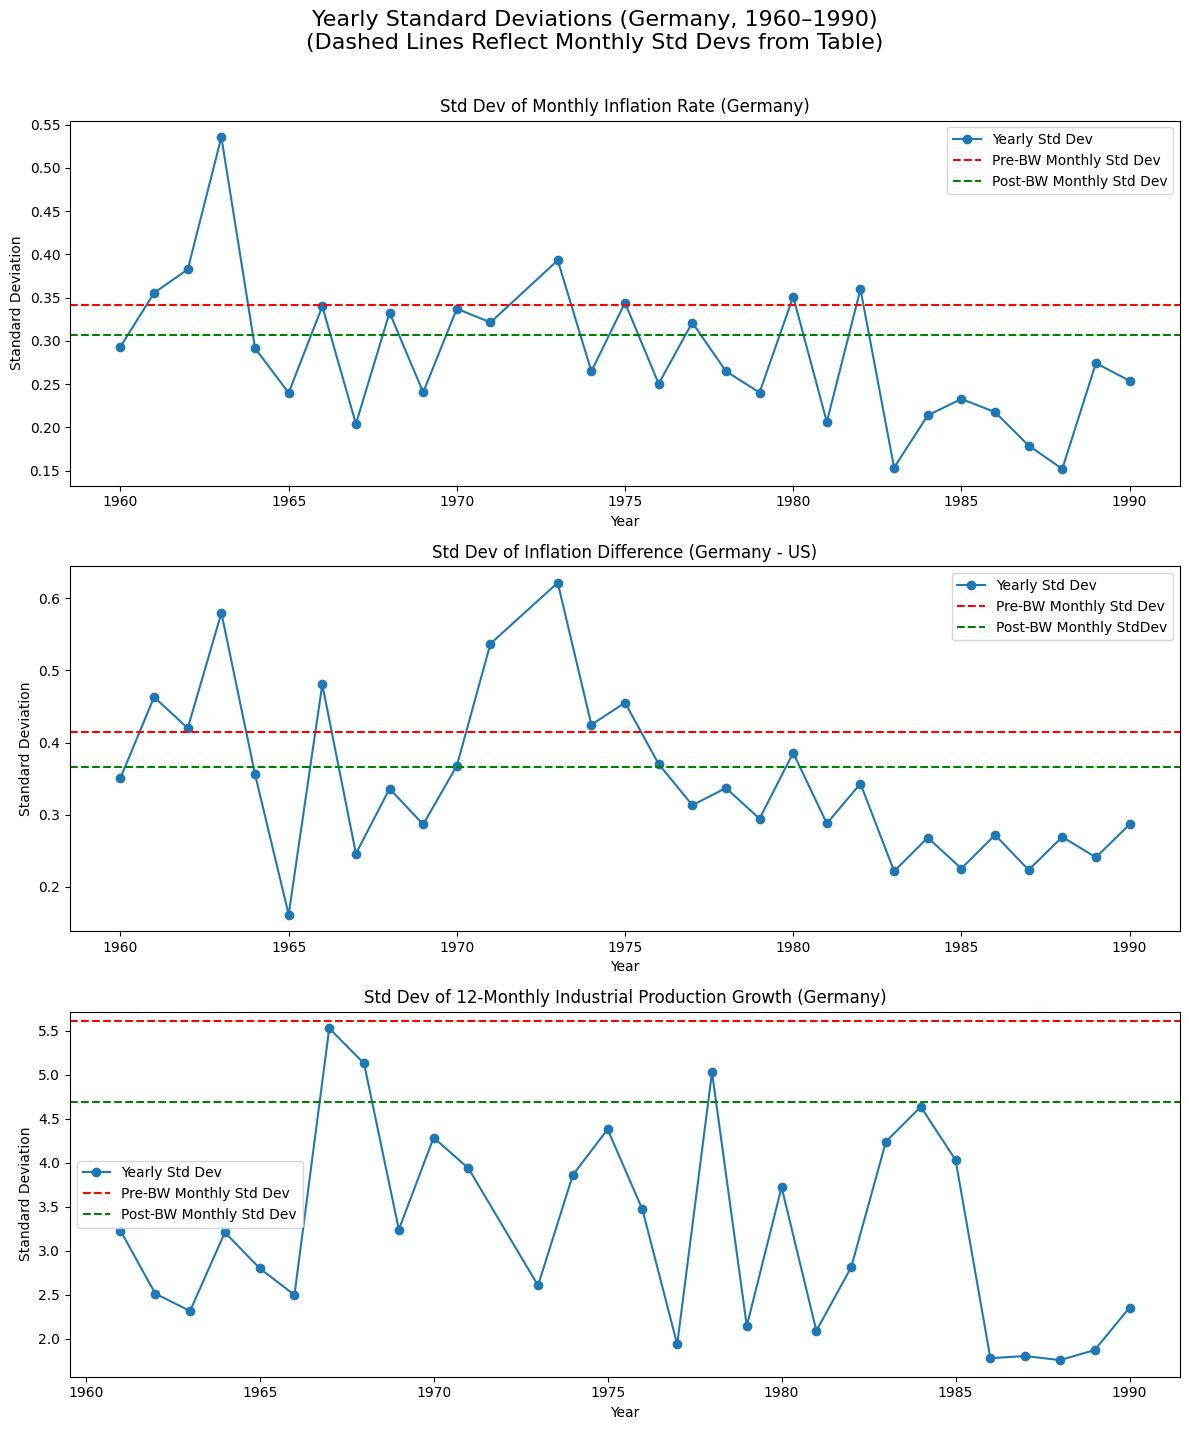

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load & preprocess data for yearly instead of monthly
df = pd.read_csv("combined_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Filter Germany & US
df_germany = df[df['Country'] == 'Germany']
df_us = df[df['Country'] == 'USA']

# Compute Inflation Difference
df_merged = pd.merge(df_germany[['Date', 'Monthly Inflation Rate']],
                     df_us[['Date', 'Monthly Inflation Rate']],
                     on='Date', suffixes=('_Germany', '_US'))
df_merged['Inflation Difference'] = df_merged['Monthly Inflation Rate_Germany'] - df_merged['Monthly Inflation Rate_US']
df_germany = df_germany.merge(df_merged[['Date', 'Inflation Difference']], on='Date', how='left')

# Exclude transition period
df_germany = df_germany[(df_germany['Date'] < '1971-07-01') | (df_germany['Date'] > '1973-02-28')]
df_germany = df_germany[(df_germany['Year'] >= 1960) & (df_germany['Year'] <= 1990)]

# Compute yearly std devs
yearly_std_inflation = df_germany.groupby('Year')['Monthly Inflation Rate'].std().reset_index(name='Std_Inflation')
yearly_std_diff = df_germany.groupby('Year')['Inflation Difference'].std().reset_index(name='Std_Diff')
yearly_std_prod = df_germany.groupby('Year')['Growth in Industrial Production'].std().reset_index(name='Std_Prod')
yearly_std = yearly_std_inflation.merge(yearly_std_diff, on='Year').merge(yearly_std_prod, on='Year')

#Defining values from previous StDev Table
monthly_pre_bw_infl = std_before["Monthly Inflation Rate"]
monthly_post_bw_infl = std_after["Monthly Inflation Rate"]

monthly_pre_bw_diff = std_before["Inflation Difference"]
monthly_post_bw_diff = std_after["Inflation Difference"]

monthly_pre_bw_prod = std_before["Growth in Industrial Production"]
monthly_post_bw_prod = std_after["Growth in Industrial Production"]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle("Yearly Standard Deviations (Germany, 1960–1990)\n(Dashed Lines Reflect Monthly Std Devs from Table)", fontsize=16)

# 1. Monthly Inflation Rate
axs[0].plot(yearly_std['Year'], yearly_std['Std_Inflation'], marker='o', label='Yearly Std Dev')
axs[0].axhline(monthly_pre_bw_infl, color='red', linestyle='--', label='Pre-BW Monthly Std Dev')
axs[0].axhline(monthly_post_bw_infl, color='green', linestyle='--', label='Post-BW Monthly Std Dev')
axs[0].set_title("Std Dev of Monthly Inflation Rate (Germany)")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Standard Deviation")
axs[0].legend()

# 2. Inflation Difference
axs[1].plot(yearly_std['Year'], yearly_std['Std_Diff'], marker='o', label='Yearly Std Dev')
axs[1].axhline(monthly_pre_bw_diff, color='red', linestyle='--', label='Pre-BW Monthly Std Dev')
axs[1].axhline(monthly_post_bw_diff, color='green', linestyle='--', label='Post-BW Monthly StdDev')
axs[1].set_title("Std Dev of Inflation Difference (Germany - US)")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Standard Deviation")
axs[1].legend()

# 3. Industrial Production Growth
axs[2].plot(yearly_std['Year'], yearly_std['Std_Prod'], marker='o', label='Yearly Std Dev')
axs[2].axhline(monthly_pre_bw_prod, color='red', linestyle='--', label='Pre-BW Monthly Std Dev')
axs[2].axhline(monthly_post_bw_prod, color='green', linestyle='--', label='Post-BW Monthly Std Dev')
axs[2].set_title("Std Dev of 12-Monthly Industrial Production Growth (Germany)")
axs[2].set_xlabel("Year")
axs[2].set_ylabel("Standard Deviation")
axs[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
